<a href="https://colab.research.google.com/github/TheGooseGuy/Insurance-Product-Prediction/blob/main/new_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Stephen Torku, Zikang Ge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV

pd.set_option('display.precision', 2)                     # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.float_format', '{:20,.2f}'.format) # get rid of scientific notation
plt.style.use('seaborn-v0_8')                             # pretty matplotlib plots

In [2]:
test = pd.read_excel("/content/drive/MyDrive/6100 Project2 DATA/Project2_Test.xlsx")

train = pd.read_excel("/content/drive/MyDrive/6100 Project2 DATA/Project2_Training.xlsx")

In [3]:
train_data = train.copy()
test_data = test.copy()

In [4]:
test_data.rename(columns={
    'ANNUALKM': 'ANNUAL_KM',
    'COMMUTEDISTANCE': 'COMMUTE_DISTANCE',
    'MARKINGSYSTEM': 'MARKING_SYSTEM',
    'TRACKINGSYSTEM': 'TRACKING_SYSTEM',
    'VEHICLEOWNERSHIP': 'VEHICLE_OWNERSHIP',
    'VEHICLEVALUE': 'VEHICLE_VALUE',
    'YEAROFBIRTH': 'YEAR_OF_BIRTH',
    'POSTALCODE': 'POSTAL_CODE',
    'AREACODE': 'AREA_CODE',
    'YEARSLICENSED': 'YEARS_LICENSED',
    'YEARSASPRINCIPALDRIVER': 'YEARS_AS_PRINCIPAL_DRIVER',
    'MULTIPRODUCT': 'MULTI_PRODUCT',
    'MARITALSTATUS': 'MARITAL_STATUS',
    'CONVICTIONCOUNTMINOR3YRS': 'CONVICTION_COUNT_MINOR_3YRS',
    'CONVICTIONCOUNTMAJOR3YRS': 'CONVICTION_COUNT_MAJOR_3YRS',
    'CONVICTIONCOUNTCRIMINAL3YRS': 'CONVICTION_COUNT_CRIMINAL_3YRS',
    'ASSIGNEDLOSSESPD5YRS': 'ASSIGNED_LOSSES_PD_5YRS',
    'SUSPENSIONCOUNT': 'SUSPENSION_COUNT',}, inplace=True)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101891 entries, 0 to 101890
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   QUOTEDATE                       101891 non-null  datetime64[ns]
 1   VEHICLEYEAR                     101891 non-null  int64         
 2   VEHICLEMAKE                     101891 non-null  object        
 3   VEHICLEMODEL                    101891 non-null  object        
 4   ANNUAL_KM                       101890 non-null  float64       
 5   COMMUTE_DISTANCE                66478 non-null   float64       
 6   MARKING_SYSTEM                  25 non-null      object        
 7   TRACKING_SYSTEM                 4 non-null       object        
 8   VEHICLE_OWNERSHIP               25441 non-null   object        
 9   VEHICLE_VALUE                   37218 non-null   float64       
 10  VEHICLEUSE                      101891 non-null  object 

#Drop Duplicates

In [ ]:
# Drop duplicate rows in train data (print number of rows)
print(f"Number of rows before dropping duplicates: {train_data.shape[0]}")
train_data = train_data.drop_duplicates()
print(f"Number of rows after dropping duplicates: {train_data.shape[0]}")

# Exploring Numerical columns

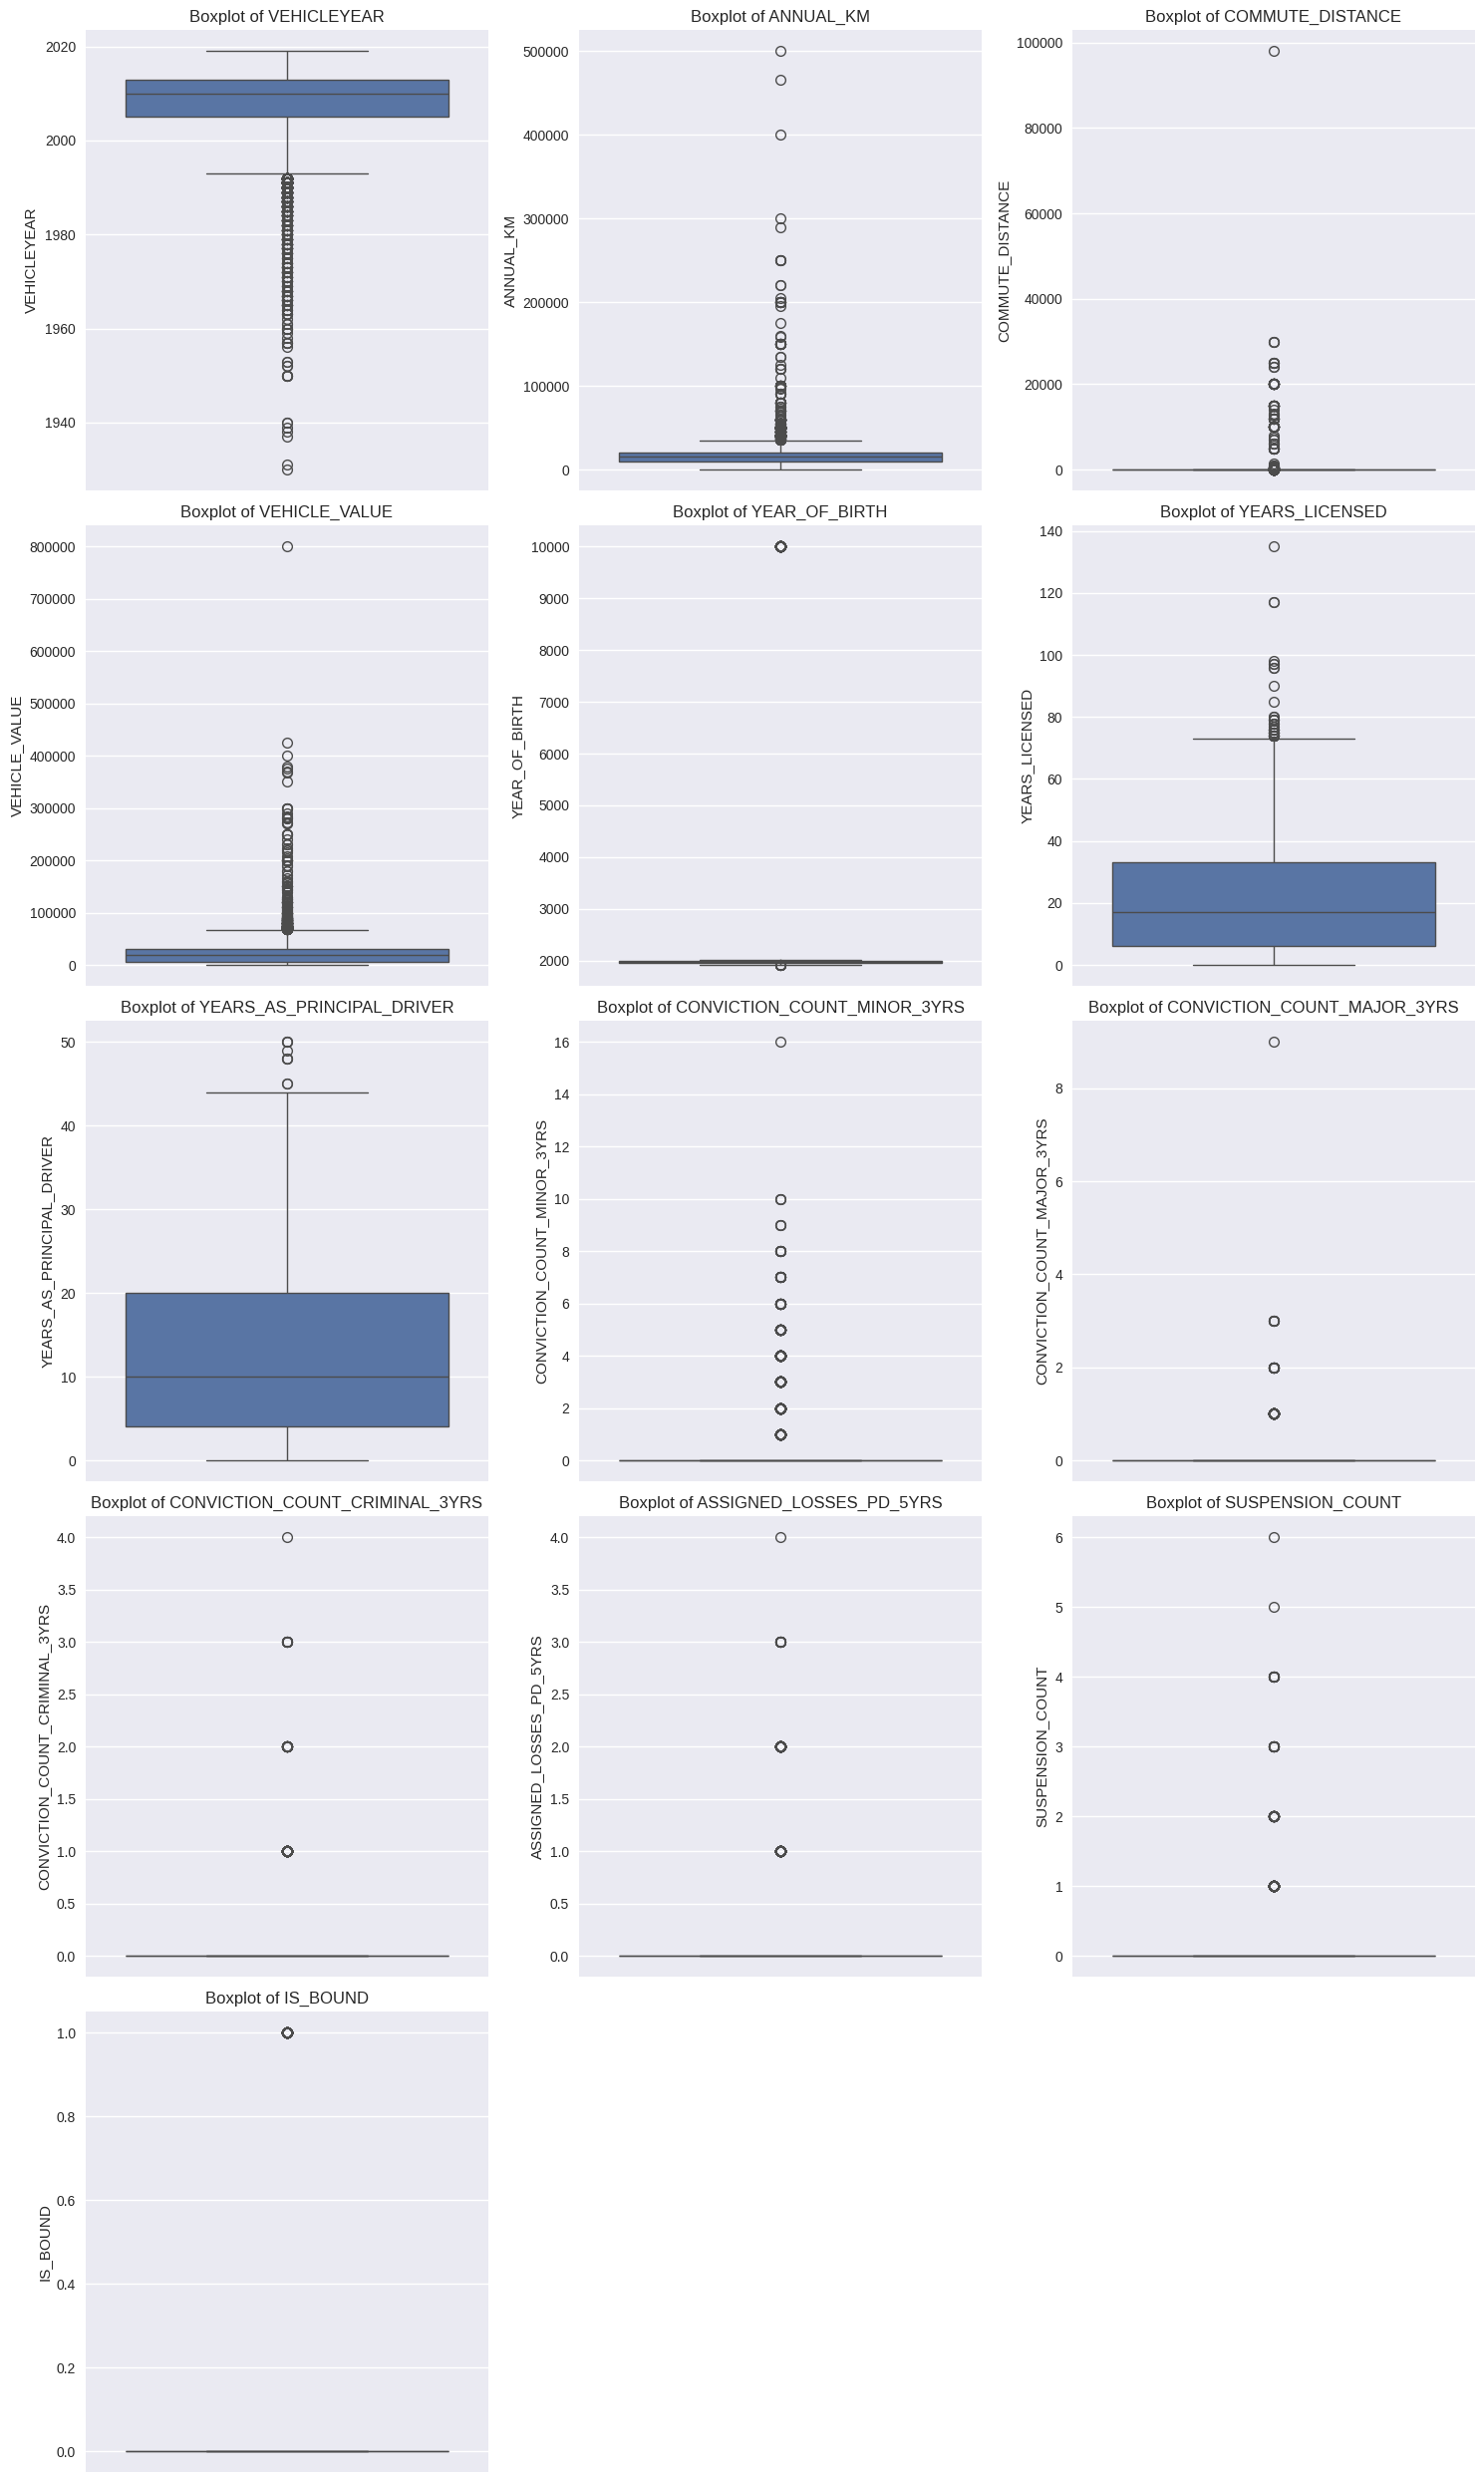

In [6]:
# Picking numerical Columns
num_cols = train_data.select_dtypes(include=['float64', 'number']).columns
num_cols = num_cols[num_cols != 'is_bound']

# Creating Subplots Grid

fig, axes = plt.subplots(nrows=(len(num_cols) // 3) + 1, ncols=3, figsize=(15, 5 * ((len(num_cols) // 3) + 1)))

# Flattening axes for easy iteration
axes = axes.flatten()

# plotting each numeric column against 'is_bound'
for i, col in enumerate(num_cols):
    sns.boxplot(y =train_data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hiding any extra subplots where numeric columns are not a multiple of 3
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
#explore outliers for some columns here

In [9]:
index_to_drop = train_data[train_data['COMMUTE_DISTANCE']>=601].index
# Dropping the abnormal points from the training data
train_df = train_data.drop(index_to_drop, axis=0)

index_to_drop = train_data[train_data['ANNUAL_KM']>300000].index
# Dropping the abnormal points from the training data
train_data = train_data.drop(index_to_drop, axis=0)

index_to_drop = train_data[train_data['VEHICLEYEAR']<1940].index
# Dropping the abnormal points from the training data
train_data = train_data.drop(index_to_drop, axis=0)

index_to_drop = train_data[train_data['VEHICLE_VALUE']>=200000].index
# Dropping the abnormal points from the training data
train_data = train_data.drop(index_to_drop, axis=0)

index_to_drop = train_data[train_data['YEARS_LICENSED']>=80].index
# Dropping the abnormal points from the training data
train_data = train_data.drop(index_to_drop, axis=0)

index_to_drop = train_data[(train_data['YEAR_OF_BIRTH']==9999)].index
# Dropping the abnormal points from the training data
train_data = train_data.drop(index_to_drop, axis=0)

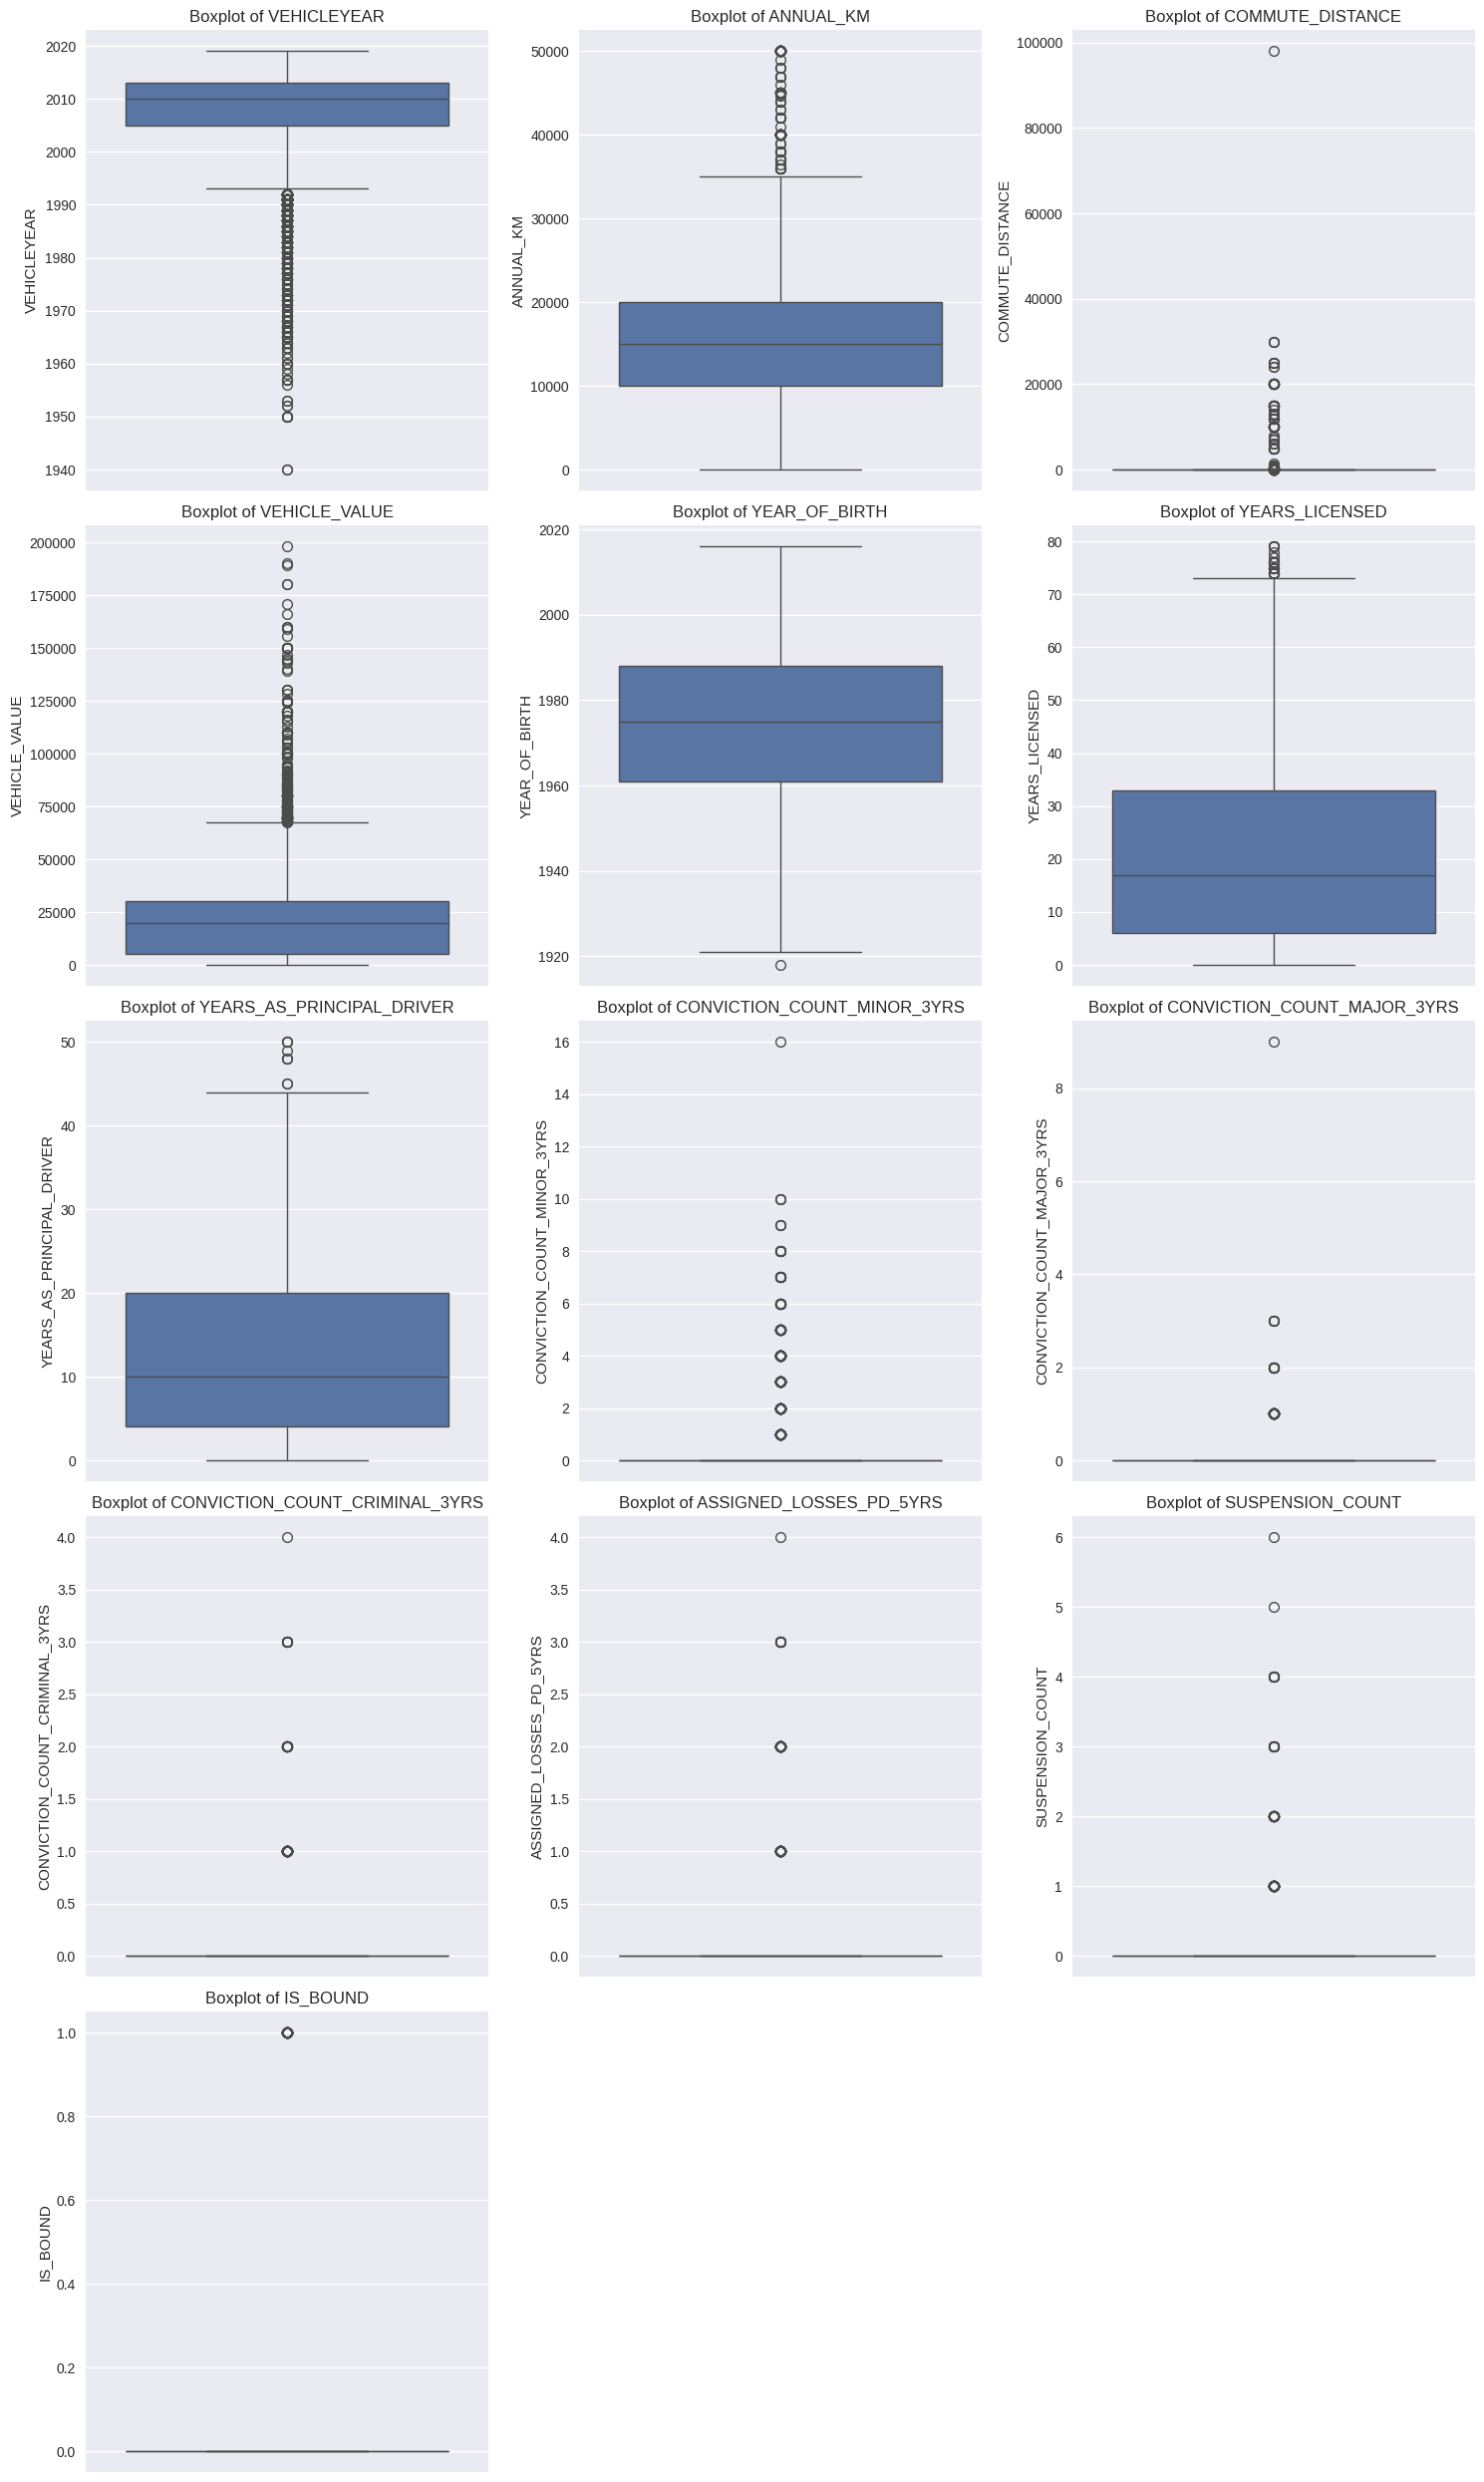

In [10]:
# Creating Subplots Grid

fig, axes = plt.subplots(nrows=(len(num_cols) // 3) + 1, ncols=3, figsize=(15, 5 * ((len(num_cols) // 3) + 1)))

# Flattening axes for easy iteration
axes = axes.flatten()

# plotting each numeric column against 'is_bound'
for i, col in enumerate(num_cols):
    sns.boxplot(y =train_data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hiding any extra subplots where numeric columns are not a multiple of 3
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [14]:
# Concatenate the datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

combined_data.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,"10,000.00",NaN,NaN,NaN,Owned,"3,000.00",...,10.00,No,Married,Trades,0,0,0,0,0,0.00
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,"20,000.00",NaN,NaN,NaN,Owned,1.00,...,NaN,No,Married,Not Known,0,0,0,0,0,0.00
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,"15,000.00",NaN,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,0.00
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,"20,000.00",20.00,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0.00
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,"30,000.00",30.00,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0.00


In [15]:
# Check for NA values in each column
for column in combined_data.columns:
    if combined_data[column].isna().sum() > 0:
        print(f"{column} has {combined_data[column].isna().sum()} missing values.")

ANNUAL_KM has 1 missing values.
COMMUTE_DISTANCE has 40363 missing values.
MARKING_SYSTEM has 116318 missing values.
TRACKING_SYSTEM has 116355 missing values.
VEHICLE_OWNERSHIP has 87485 missing values.
VEHICLE_VALUE has 74466 missing values.
YEARS_LICENSED has 11 missing values.
YEARS_AS_PRINCIPAL_DRIVER has 115585 missing values.
IS_BOUND has 15114 missing values.


In [18]:
# Dropping Columns With Missing Values Over 100k
combined_data.drop(columns=['YEARS_AS_PRINCIPAL_DRIVER', 'TRACKING_SYSTEM','MARKING_SYSTEM'], axis =1, inplace=True)
combined_data.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,VEHICLE_OWNERSHIP,VEHICLE_VALUE,VEHICLEUSE,GENDER,...,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,"10,000.00",10.00,Owned,"3,000.00",Pleasure,Male,...,25.00,No,Married,Trades,0,0,0,0,0,0.00
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,"20,000.00",10.00,Owned,1.00,Business,Male,...,10.00,No,Married,Not Known,0,0,0,0,0,0.00
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,"15,000.00",10.00,Owned,"22,000.00",Pleasure,Male,...,39.00,No,Single,Not Known,0,0,0,0,0,0.00
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,"20,000.00",20.00,Owned,"16,000.00",Commute,Male,...,3.00,Yes,Single,Not Known,0,0,0,0,0,0.00
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,"30,000.00",30.00,Owned,"18,000.00",Commute,Male,...,2.00,Yes,Single,Not Known,0,0,0,0,0,0.00


In [16]:
# Filling missing values with the median
combined_data["ANNUAL_KM"] = combined_data["ANNUAL_KM"].fillna(combined_data["ANNUAL_KM"].median())

# Filling missing values with the mode of vehicle ownership which is the category 'owned'
combined_data["VEHICLE_OWNERSHIP"] = combined_data["VEHICLE_OWNERSHIP"].fillna(combined_data["VEHICLE_OWNERSHIP"].mode()[0])


# Filling missing values of years licensed with median years licensed of each year_of_birth
combined_data['YEARS_LICENSED'] = combined_data.groupby('YEAR_OF_BIRTH')['YEARS_LICENSED'].transform(lambda value: value.fillna(value.median()))

# Filling missing values of vehicle value with median vehicle value of each vehicle make
combined_data['VEHICLE_VALUE'] = combined_data.groupby('VEHICLEMAKE')['VEHICLE_VALUE'].transform(lambda value: value.fillna(value.median()))

# Filling remaining missing values with median of vehicle value for rows with blank vehicle model
combined_data['VEHICLE_VALUE'] = combined_data['VEHICLE_VALUE'].fillna(combined_data['VEHICLE_VALUE'].median())


# Indexing retirees and unemployed to fill their commute distances with zeros as retirees and unemployed should not have any commute distance to work from home.
index_to_fill = combined_data[(combined_data['OCCUPATION'] == 'Retired') | (combined_data['OCCUPATION'] == 'Unemployed')].index

# Replacing commute distances of indexed group with zero
combined_data.loc[index_to_fill, 'COMMUTE_DISTANCE'] = 0

# Filling remaining missing values with median of each occupation
combined_data['COMMUTE_DISTANCE'] = combined_data.groupby('OCCUPATION')['COMMUTE_DISTANCE'].transform(lambda value: value.fillna(value.median()))

# Filling remaining missing values with median of commute_distance for rows with blank occupation
combined_data['COMMUTE_DISTANCE'] = combined_data['COMMUTE_DISTANCE'].fillna(combined_data['COMMUTE_DISTANCE'].median());

In [19]:
# Check for NA values in each column
for column in combined_data.columns:
    if combined_data[column].isna().sum() > 0:
        print(f"{column} has {combined_data[column].isna().sum()} missing values.")

IS_BOUND has 15114 missing values.


In [21]:
combined_data['VEHICLEMODEL'].value_counts()
combined_data.drop(columns=['VEHICLEMODEL'], axis =1, inplace=True)

In [22]:
replacements = {
  # Volkswagen variations
  r'\bVW\b|\bWV\b|\bVOLKS\b|VOLKSWAGON|VOLGSWAGEN|VOLSWAGEN|VOLKSWAGENJAVASCRIPT:VOID\(0\)|VOLLKS|VOLKSWAGEN(?:\s+TRUCK/VAN|\s+CAMION/VA)?': 'VOLKSWAGEN',

  # Honda variations
  r'HONDA(?:\s+TRUCK/VAN|\s+CAMION/VAN)?|HONODA|HONDA \s*CIVIC|HONDA \s*ACCORD|HONDA \s*CR-\s*V|HONDA \s*650|CIVIC': 'HONDA',

  # Ford variations
  r'\bFORD\b|\bF150\b|\bF250\b|FORD \s*150|FORD \s*FOCUS|FORD \s*EDGE|FORD \s*MUSTANG|FORD(?:\s+TRUCK/VAN|\s+CAMION/VAN)?|RANGER|MUSTANG': 'FORD',

  # Dodge/Ram variations
  r'RAM|DODGE|DOGDE|DODGE/RAM(?:\s+TRUCK/VAN|\s+CAMION/VAN)?|DODGE \s*RAM|DODGE \s*GRAND \s*CARAVAN|GRAND \s*CARAVAN|CHALLENGER|DODDGE': 'DODGE',

  # Chevrolet variations
  r'\bCHEV\b|CHEVY|CHEVROLET(?:\s+TRUCK/VAN|\s+CAMION/VAN)?|CHEVROLER|CHEVROLE|CHEVROELT|CHERVOLET|CEVROLET|CHEVRELOT|CORVETTE|EL \s*CAMINO|ASTRO|MAILBOU|Z28|SPRINT': 'CHEVROLET',

  # Toyota variations
  r'TOYOTA(?:\s+TRUCK/VAN|\s+CAMION/VAN)?|TOYOATA|TOYOTO|TOTOTA|TOYTO|CORROLLA|COROLLA|CAMRY|CELICA|MATRIX|TOYOTA \s*HIGHLANDER': 'TOYOTA',

  # Mercedes variations
  r'MERCEDES \s*BENZ|MERCEDEZ \s*BENZ|MECEDEZ|MERCEDES-BENZ(?:\s+TRUCK)?|MERCEDES|E350|MERZ': 'MERCEDES-BENZ',

  # Chrysler variations
  r'CHYRSLER|CHRYSLER(?:\s+TRUCK/VAN)?|CRYSLER|CHRYLSER|CHRSYLER': 'CHRYSLER',

  # Nissan variations
  r'NISSIAN|NISSAN(?:\s+TRUCK/VAN|\s+CAMION/VAN)?|NISSSAN|NISASN|ALTIMA|NISAN': 'NISSAN',

  # Pontiac variations
  r'PONTIAC(?:\s+TRUCK/VAN)?|PONTAIC|PONTIIAC|POTIAC|PONITAC': 'PONTIAC',

  # Mazda variations
  r'MAZDA(?:\s+TRUCK/VAN|\s+CAMION/VAN)?|MADZA|MAZDS|MAZDA3|MAZDA \s*3': 'MAZDA',

  # Hyundai variations
  r'HYUNDAI(?:\s+TRUCK/VAN|\s+CAMION/VAN)?|HYNDAI|HYUNDIA|HUNDAY|HUNDAI|HYNDEI|HYUANDAI|ELANTRA|ELANTRA \s*GT': 'HYUNDAI',

  # Infiniti variations
  r'INFINITY|INFINTI|INFINITI(?:\s+TRUCK/VAN)?': 'INFINITI',

  # Porsche variations
  r'PORCHE|PROSCHE|PORSCHE(?:\s+TRUCK/VAN)?': 'PORSCHE',

  # Land Rover variations
  r'LANDROVER|RANGE \s*ROVER|ROVER|LAND \s*ROVER': 'LAND ROVER',

  # Acura variations
  r'ACCURA|ACURA(?:\s+TRUCK/VAN|\s+CAMION/VAN)?': 'ACURA',

  # BMW variations
  r'BMW(?:\s+TRUCK/VAN)?': 'BMW',

  # Cadillac variations
  r'CADILLAC(?:\s+TRUCK/VAN)?|CADILLIAC': 'CADILLAC',

  # GMC variations
  r'GMC(?:\s+TRUCK/VAN)?|GMC \s*RALLY|SIERRA \s*2500': 'GMC',

  # Other major manufacturers
  r'BUICK(?:\s+TRUCK/VAN)?': 'BUICK',
  r'JEEP|JEPP|JEEP \s*WRANGLER': 'JEEP',
  r'SUBARU(?:\s+TRUCK/VAN)?': 'SUBARU',
  r'VOLVO(?:\s+TRUCK/VAN)?': 'VOLVO',
  r'KIA(?:\s+TRUCK/VAN|\s+CAMION/VAN)?': 'KIA',
  r'LINCOLN(?:\s+TRUCK/VAN)?': 'LINCOLN',
  r'LEXUS(?:\s+TRUCK/VAN|\s+CAMION/VAN)?': 'LEXUS',
  r'MERCURY(?:\s+TRUCK/VAN)?': 'MERCURY',
  r'SATURN(?:\s+TRUCK/VAN)?|VUE': 'SATURN',
  r'OLDSMOBILE(?:\s+TRUCK/VAN)?|CUTLASS': 'OLDSMOBILE',
  r'AUDI(?:\s+TRUCK/VAN)?': 'AUDI',
  r'MINI(?:\s+COOPER)?': 'MINI',
  r'SCION': 'SCION',
  r'SUZUKI(?:\s+TRUCK/VAN)?': 'SUZUKI',

  # Luxury/Exotic Brands
  r'MASERATI|MAZERATI': 'MASERATI',
  r'BENTLEY': 'BENTLEY',
  r'LAMBORGHINI|DIABLO': 'LAMBORGHINI',
  r'FERRARI': 'FERRARI',
  r'ALFA|ALFA \s*ROMEO': 'ALFA ROMEO',
  r'ASTON \s*MARTIN': 'ASTON MARTIN',
  r'ROLLS \s*ROYCE': 'ROLLS ROYCE',
  r'MCLAREN': 'MCLAREN',

  # Electric/Modern
  r'TESLA(?:\s+TRUCK/VAN)?': 'TESLA',
  r'FISKER': 'FISKER',

  # Discontinued/Classic
  r'PLYMOUTH(?:\s+TRUCK/VAN)?|PLYMONTH': 'PLYMOUTH',
  r'SAAB': 'SAAB',
  r'JAGUAR(?:\s+TRUCK/VAN)?': 'JAGUAR',
  r'SMART': 'SMART',
  r'DATSUN': 'DATSUN',
  r'MG|MGB|MGA': 'MG',
  r'HUMMER': 'HUMMER',
  r'GEO(?:\s+TRUCK/VAN)?': 'GEO',
  r'EAGLE': 'EAGLE',
  r'DAEWOO': 'DAEWOO',
  r'DIHATSU': 'DAIHATSU',

  # Commercial/Other
  r'KENWORTH': 'KENWORTH',
  r'FREIGHTLINER': 'FREIGHTLINER',
  r'HINO': 'HINO',
  r'INTERNATIONAL': 'INTERNATIONAL',
  r'AM \s*GENERAL': 'AM GENERAL',
  r'YAMAHA': 'YAMAHA',
  r'UNITED': 'UNITED',
  r'ROYAL': 'ROYAL',
  r'MONICO': 'MONACO',

  # Motorcycles/Recreational
  r'HARLEY|HARLEY \s*DAVIDSON|STREET \s*GLIDE \s*SPECIAL': 'HARLEY DAVIDSON',
  r'ARCTIC \s*CAT|ARTCIT \s*CAT|ARTIC \s*CAT': 'ARCTIC CAT',
  r'BOMBARDIER|BOMBADIER|SKI-DOO|SKIDOO': 'BOMBARDIER',
  r'KTM': 'KTM',
  r'KABUTO': 'KABUTO',
  r'SCOOTTERRE': 'SCOOTTERRE',

  # Generic/Unknown
  r'CAR': 'Unknown',
  r'UNDISCLOSED': 'Unknown',
  r'CONVERTED': 'Unknown',
  r'2XXXXXXXXXXXXXXXXXX': 'Unknown',


  # Non-specific Truck/Van entries
  r'(?:TRUCK|VAN|CAMION)': '',  # These should be removed or handled separately

  # Regional Variations
  r'GMC \s*CAMION/VAN': 'GMC',
  r'TOYOTA \s*CAMION/VAN': 'TOYOTA',
  r'HONDA \s*CAMION/VAN': 'HONDA',
  r'MAZDA \s*CAMION/VAN': 'MAZDA',
  r'VOLKSWAGEN \s*CAMION/VA': 'VOLKSWAGEN',
  r'MITSUBISHI \s*CAMION/VA': 'MITSUBISHI',

  # Clean up specific patterns
  r'/.*$': '',  # Remove anything after a forward slash
  r'\s+': ' ',  # Standardize spaces
  r'^\s|\s$': ''  # Remove leading/trailing spaces
}

combined_data['VEHICLEMAKE'] = combined_data['VEHICLEMAKE'].str.upper().str.strip()

# Apply all replacements in place
combined_data['VEHICLEMAKE'].replace(replacements, regex=True, inplace=True)

# Final cleanup in place
combined_data['VEHICLEMAKE'] = (combined_data['VEHICLEMAKE']
                           .str.strip()
                           .str.replace(r'\s+', ' ', regex=True)  # Standardize spaces
                           .str.replace(r'/.*$', '', regex=True)  # Remove anything after /
                           )

# First, apply upper case and strip whitespace
combined_data['VEHICLEMAKE'] = combined_data['VEHICLEMAKE'].str.upper().str.strip()

# Apply regex replacements iteratively in a simplified form
for pattern, replacement in replacements.items():
    combined_data['VEHICLEMAKE'] = combined_data['VEHICLEMAKE'].str.replace(pattern, replacement, regex=True)

# Additional cleanup to standardize spaces and remove trailing info
combined_data['VEHICLEMAKE'] = (combined_data['VEHICLEMAKE']
                                .str.replace(r'\s+', ' ', regex=True)  # Standardize spaces
                                .str.replace(r'/.*$', '', regex=True)  # Remove anything after /
                                .str.strip())  # Remove leading/trailing spaces

# Grouping less common makes
threshold = 100  # Example threshold for frequency
top_makes = combined_data['VEHICLEMAKE'].value_counts()[combined_data['VEHICLEMAKE'].value_counts() > threshold].index
combined_data['VEHICLEMAKE'] = combined_data['VEHICLEMAKE'].apply(lambda x: x if x in top_makes else 'Other')

<ipython-input-22-7d7c141883f2>:148: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['VEHICLEMAKE'].replace(replacements, regex=True, inplace=True)


In [23]:
cat_cols = combined_data.select_dtypes(include='object').columns


combined_data[cat_cols] = combined_data[cat_cols].astype(str)
combined_data[cat_cols] = combined_data[cat_cols].apply(lambda x: x.astype(str))

In [25]:
# Obtainig Dummies
combined_data = pd.get_dummies(combined_data, drop_first=True)

In [27]:
combined_data.drop(columns = 'QUOTEDATE', axis=1, inplace = True)


num_cols = list(combined_data.select_dtypes(include=['float64', 'int64']).columns)

num_cols.remove('IS_BOUND')
num_cols

['VEHICLEYEAR',
 'ANNUAL_KM',
 'COMMUTE_DISTANCE',
 'VEHICLE_VALUE',
 'YEAR_OF_BIRTH',
 'YEARS_LICENSED',
 'CONVICTION_COUNT_MINOR_3YRS',
 'CONVICTION_COUNT_MAJOR_3YRS',
 'CONVICTION_COUNT_CRIMINAL_3YRS',
 'ASSIGNED_LOSSES_PD_5YRS',
 'SUSPENSION_COUNT']

In [28]:
scaler = StandardScaler()

combined_data[num_cols] = scaler.fit_transform(combined_data[num_cols])

combined_data.head()

,VEHICLEYEAR,ANNUAL_KM,COMMUTE_DISTANCE,VEHICLE_VALUE,YEAR_OF_BIRTH,YEARS_LICENSED,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,...,OCCUPATION_Professional/Health,OCCUPATION_Professional/Other,OCCUPATION_Professional/Social,OCCUPATION_Retired,OCCUPATION_Sales,OCCUPATION_Service Work,OCCUPATION_Student,OCCUPATION_Trades,OCCUPATION_Tradesman,OCCUPATION_Unemployed
0,-0.51,-0.67,-0.04,-1.49,-0.01,0.26,-0.32,-0.05,-0.07,-0.24,...,False,False,False,False,False,False,False,True,False,False
1,1.39,0.74,-0.04,-1.74,-0.13,-0.66,-0.32,-0.05,-0.07,-0.24,...,False,False,False,False,False,False,False,False,False,False
2,1.04,0.04,-0.04,0.08,-0.12,1.13,-0.32,-0.05,-0.07,-0.24,...,False,False,False,False,False,False,False,False,False,False
3,0.18,0.74,-0.02,-0.41,0.07,-1.09,-0.32,-0.05,-0.07,-0.24,...,False,False,False,False,False,False,False,False,False,False
4,0.70,2.14,-0.00,-0.25,0.04,-1.15,-0.32,-0.05,-0.07,-0.24,...,False,False,False,False,False,False,False,False,False,False


In [30]:
combined_data['IS_BOUND']

,IS_BOUND
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
116356,NaN
116357,NaN
116358,NaN
116359,NaN


In [31]:
condition = (combined_data['IS_BOUND'].isnull())

train_data = combined_data[~condition]

test_data = combined_data[condition]

In [33]:
X = train_data.drop('IS_BOUND', axis=1)
y = train_data['IS_BOUND']

Accuracy: 0.7807901234567901


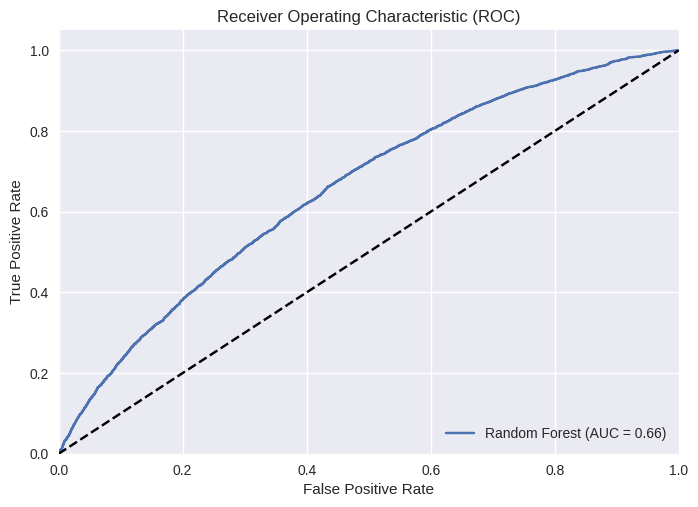

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split data with important features into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a new RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=5, min_samples_leaf=1, max_depth=10)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate ROC curve and AUC
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer


def revenue_score(y_true, y_pred):
    # Calculate confusion matrix components
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives

    # Calculate revenue
    revenue = (5.5 * tp) - (1 * (tp + fp))
    return revenue
revenue_scorer = make_scorer(revenue_score, greater_is_better=True)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring=revenue_scorer,  # Use custom scorer
    n_jobs=-1,
    random_state=42
)


# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Use the best model for prediction
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
final_revenue = revenue_score(y_test, y_pred)
print("Final Revenue:", final_revenue)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best score: 434.1
Final Revenue: 636.0


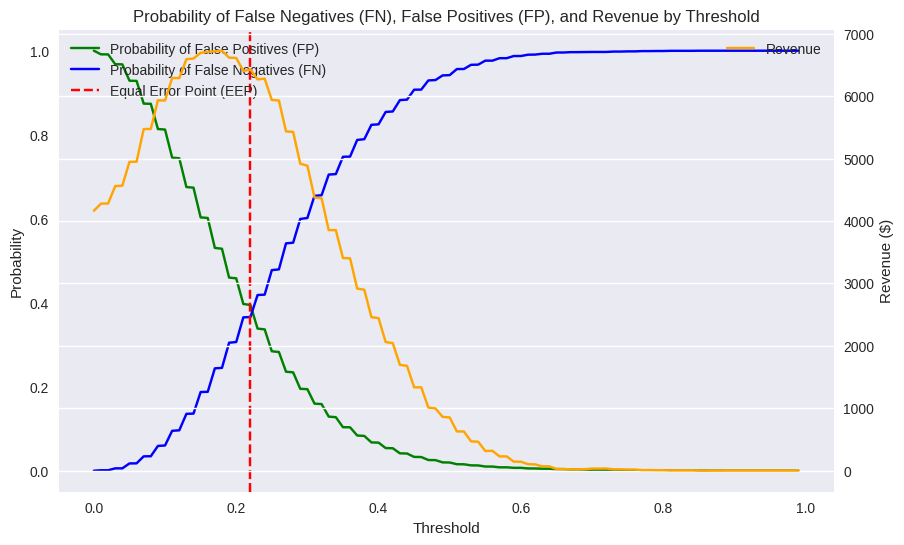

Equal Error Point (EEP) Threshold: 0.22


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict probabilities for the positive class
y_probs = best_rf_model.predict_proba(X_test)[:, 1]

# Define a range of thresholds
thresholds = np.arange(0.0, 1.0, 0.01)
false_positive_rates = []
false_negative_rates = []
revenues = []

# Calculate FPR, FNR, and revenue for each threshold
for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)

    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test[:len(y_pred)], y_pred).ravel()

    # Calculate false positive rate and false negative rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

    # Append FPR and FNR to lists
    false_positive_rates.append(fpr)
    false_negative_rates.append(fnr)

    # Calculate revenue: (5.5 * True Positives) - (1 * Predicted Positives)
    revenue = (5.5 * tp) - (1 * (tp + fp))
    revenues.append(revenue)

# Plotting FPR and FNR against thresholds
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot false positive and false negative rates
ax1.plot(thresholds, false_positive_rates, label="Probability of False Positives (FP)", color="green")
ax1.plot(thresholds, false_negative_rates, label="Probability of False Negatives (FN)", color="blue")
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Probability")
ax1.set_title("Probability of False Negatives (FN), False Positives (FP), and Revenue by Threshold")
ax1.grid()
ax1.legend(loc="upper left")

# Plot revenue on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(thresholds, revenues, label="Revenue", color="orange")
ax2.set_ylabel("Revenue ($)")
ax2.legend(loc="upper right")

# Mark the Equal Error Point (EEP) where FP and FN rates intersect
equal_error_point = thresholds[np.argmin(np.abs(np.array(false_positive_rates) - np.array(false_negative_rates)))]
ax1.axvline(equal_error_point, color="red", linestyle="--", label="Equal Error Point (EEP)")
ax1.legend(loc="upper left")

plt.show()

print(f"Equal Error Point (EEP) Threshold: {equal_error_point}")

In [42]:
# Align test data columns with training data
test_data = test_data.reindex(columns=X.columns, fill_value=0)

# Get probabilities for the positive class (ISBOUND=1)
probabilities = best_rf_model.predict_proba(test_data)[:, 1]

# Apply the EEP threshold
threshold = 0.22
predictions = (probabilities >= threshold).astype(int)

# Convert predictions to a list
list_predictions = predictions.tolist()
rounded_list_predictions = [int(x) for x in list_predictions]

# Output predictions
print("Predictions:", rounded_list_predictions)
print("Number of predictions:", len(rounded_list_predictions))

Predictions: [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,